In [15]:
!pip install tqdm

In [22]:
# import required libraries
import praw
from IPython import display
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sns.set(style='darkgrid')

In [11]:
reddit = praw.Reddit(client_id='vm4lkJvkhWM00FjppcHjPA',
                     client_secret='m2-rS76QQV22MAUv2E7bB0YzRA0U4w',
                     user_agent='MrKimhof')

In [12]:
# define set for headlines
# set removes chances of getting duplicate headlines
headlines = set()

In [20]:
# for each post is the /r/politics subreddit, iterate through and extract the headlines
for post in reddit.subreddit('politics').new(limit=None):
    headlines.add(post.title)
    display.clear_output()
    print(len(headlines))

973


In [30]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\taylo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\taylo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [29]:
# use vader SIA to rank each portion of the text as positive, negative, or neutral

# create new sia object
sia = SIA()
results = [] # empty to list to append calculated polarity scores

# iterate through each headline in set and append to results list
for headline in headlines:
    polarity = sia.polarity_scores(headline)
    polarity['headlines'] = headline
    results.append(polarity)

# print results to ensure scores encoded properly
pprint(results[:5], width=75)

[{'compound': -0.6808,
  'headlines': 'Election denier Finchem defeated in Arizona secretary of '
               'state race',
  'neg': 0.412,
  'neu': 0.588,
  'pos': 0.0},
 {'compound': -0.7184,
  'headlines': 'The Attempt to Anoint Ron DeSantis as Trump’s Heir Will '
               'Fail: Republican elites are making the same mistakes they '
               'made in 2016.',
  'neg': 0.231,
  'neu': 0.769,
  'pos': 0.0},
 {'compound': 0.0,
  'headlines': 'White House asks Congress for $37.7B in new Ukraine aid',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': -0.7845,
  'headlines': 'Blame All the Single Ladies - Some pundits on the right '
               'have decided that unmarried women are at fault for the '
               'GOP’s electoral dysfunction.',
  'neg': 0.283,
  'neu': 0.717,
  'pos': 0.0},
 {'compound': 0.6486,
  'headlines': 'Two Winners in Tuesday’s Election: Liz Cheney and '
               'Democracy | Despite pundits’ predictions, the country was '
        

In [31]:
# create pandas dataframe from records create in previous step
df = pd.DataFrame.from_records(results)
df.head() # display first five obs to ensure data loaded properly

,neg,neu,pos,compound,headlines
0,0.412,0.588,0.000,-0.6808,Election denier Finchem defeated in Arizona se...
1,0.231,0.769,0.000,-0.7184,The Attempt to Anoint Ron DeSantis as Trump’s ...
2,0.000,1.000,0.000,0.0000,White House asks Congress for $37.7B in new Uk...
3,0.283,0.717,0.000,-0.7845,Blame All the Single Ladies - Some pundits on ...
4,0.079,0.679,0.242,0.6486,Two Winners in Tuesday’s Election: Liz Cheney ...


In [36]:
# create new label column and encode:
#    0: neutral
#    1: positive (compound > +0.2)
#   -1: negative (compound < -0.2)
df['label'] = 0
df.loc[df.compound == 0, 'label'] = 0
df.loc[df.compound > 0.2, 'label'] = 1.0
df.loc[df.compound < -0.2, 'label'] = -1

# display first five obs to ensure new column added properly
df.head()

,neg,neu,pos,compound,headlines,0,label
0,0.412,0.588,0.000,-0.6808,Election denier Finchem defeated in Arizona secretary of state race,-1.0,-1.0
1,0.231,0.769,0.000,-0.7184,The Attempt to Anoint Ron DeSantis as Trump’s Heir Will Fail: Republican elites are making the same mistakes they made in 2016.,-1.0,-1.0
2,0.000,1.000,0.000,0.0000,White House asks Congress for $37.7B in new Ukraine aid,0.0,0.0
3,0.283,0.717,0.000,-0.7845,Blame All the Single Ladies - Some pundits on the right have decided that unmarried women are at fault for the GOP’s electoral dysfunction.,-1.0,-1.0
4,0.079,0.679,0.242,0.6486,"Two Winners in Tuesday’s Election: Liz Cheney and Democracy | Despite pundits’ predictions, the country was energized to vote against election deniers.",1.0,1.0


In [38]:
# create new df with just target label and headline feature
df2 = df[['headlines', 'label']]

## Dataset Overview and EDA

In [44]:
# view samples of positive and negative headlines
print('Below are some samples of positive headlines:\n')
pprint(list(df[df['label'] == 1].headlines)[:5], width=75)

print('\n\n' + '*' * 75 + '\n\n')

print('Below are some samples of negative headlines:\n')
pprint(list(df[df['label'] == -1].headlines)[:5], width=75)

Below are some samples of positive headlines:

['Two Winners in Tuesday’s Election: Liz Cheney and Democracy | Despite '
 'pundits’ predictions, the country was energized to vote against '
 'election deniers.',
 'Megathread: Cortez Masto wins Nevada Senate race, clinching Democratic '
 'control of Senate Democrats; Georgia Senate Runoff Set for December 6th',
 'Meet the Pollster Who Convinced Republicans There Would Be a Red Wave',
 'New York Democrats urge Hochul to push out the state party chair.',
 'After election, Texas Democrats admit faltering on messaging, voter '
 'turnout']


***************************************************************************


Below are some samples of negative headlines:

['Election denier Finchem defeated in Arizona secretary of state race',
 'The Attempt to Anoint Ron DeSantis as Trump’s Heir Will Fail: '
 'Republican elites are making the same mistakes they made in 2016.',
 'Blame All the Single Ladies - Some pundits on the right have decided '
 '

In [51]:
# check amount of positive, negative, and neutral headlines are measured in the dataset
print(df['label'].value_counts()) # total count
print(df['label'].value_counts(normalize=True) * 100) # representation as a proportion of the data

 0.0    433
-1.0    310
 1.0    230
Name: label, dtype: int64
 0.0    44.501542
-1.0    31.860226
 1.0    23.638232
Name: label, dtype: float64


Nearly 1/2 of the headlines have been encoded as `neutral`, while approximately 32% of the headlines are `negative`. The remaining 24% are `positive`

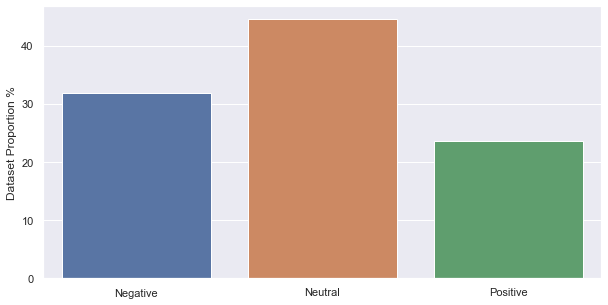

In [52]:
# view the same info as a bar chart visualization
fig, ax = plt.subplots(figsize=(10,5))

counts = df['label'].value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel('Dataset Proportion %')

plt.show()

So, something to keep in mind as the project progresses is that the dataset is quite biases towards `neutral` rating score

## Tokenizing The Data and Accounting For Stopwords

In [60]:
# create tokens for each record so that it can be more easily understood by a machine
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords

# create new regular expression tokenizer object
tokenizer = RegexpTokenizer(r'\w+')

# create new stopwords object
stop_words = stopwords.words('english')

In [61]:
# utility function that takes headlines as input, and returns clean "tokens"
def tokenize_and_remove_stopwords(headlines):
    tokens = [] # init empty list to append new tokens

    # iterate through each headline and create token and remove stopwords
    for headline in headlines:
        token = tokenizer.tokenize(headline)
        token = [t.lower() for t in token if t.lower() not in stop_words]
        tokens.extend(token)

    return tokens

In [64]:
# extract common words from positive headlines using freqdist function
positive_headlines = list(df[df['label'] == 1].headlines)

# extract tokens using utility function
positive_tokens = tokenize_and_remove_stopwords(positive_headlines)
positive_frequency = nltk.FreqDist(positive_tokens)

# display most common positive tokens
positive_frequency.most_common(15)

[('democrats', 43),
 ('trump', 34),
 ('senate', 33),
 ('arizona', 31),
 ('wins', 30),
 ('win', 27),
 ('election', 22),
 ('supreme', 22),
 ('court', 22),
 ('house', 20),
 ('biden', 18),
 ('gop', 18),
 ('party', 17),
 ('race', 16),
 ('control', 14)]